[View in Colaboratory](https://colab.research.google.com/github/afarane/kaggle/blob/master/kaggle_titanic.ipynb)

## Titanic Dataset Exploration by @afarane

[ https://www.kaggle.com/c/titanic/data ]



## 1. Load Dataset and Overview

In [0]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Load train & test Dataset 
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Profile Report on Dataset 
#pfr = pandas_profiling.ProfileReport(train_data)
#report.to_file("DS_Titanic_AF.html")

print('[AF] train data: %s, test data %s' %(str(train_data.shape), str(test_data.shape)) )

print('_'*150)
train_data.head()

[AF] train data: (891, 12), test data (418, 11)
______________________________________________________________________________________________________________________________________________________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ali, Mr. William",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## 2. Check Unique Values :

In [6]:

print('_'*80)
#------------------------ PasengerID ---------------------------
# Check If PassengerId is Unique 
if (train_data.PassengerId.nunique() == train_data.shape[0]):
    print('[AF] PassengerId in train_data is Unique.') 
else:
    print('-[Error]PassengerId in train_data is not Unique.')    
    
# Check If PassengerId is Unique 
if (test_data.PassengerId.nunique() == test_data.shape[0]):
    print('[AF] PassengerId in test_data is Unique.') 
else:
    print('-[Error]PassengerId in test_data is not Unique.')       
    
if (len(np.intersect1d(train_data.PassengerId.values, test_data.PassengerId.values))== 0 ):
    print('[AF] PassengerId in train and test datasets are Distinct.')
else:
    print('- [Error] PassengerId in train and test datasets are NOT Distinct.')
    
#AF: PasengerID : Yes
print('_'*80)
#-------------------------- Name -------------------------

if (train_data.Name.nunique() == train_data.shape[0]):
    print('[AF] Name in train_data is Unique.') 
else:
    print('-[Error] Name in train_data is not Unique.')        

if (test_data.Name.nunique() == test_data.shape[0]):
    print('[AF] Name in test_data is Unique.') 
else:
    print('-[Error] Name in test_data is not Unique.')       
    
if (len(np.intersect1d(train_data.Name.values, test_data.Name.values))== 0 ):
    print('[AF] Name in train and test datasets are Distinct.')
else:
    print('- [Error] Name in train and test datasets are NOT Distinct.')    

________________________________________________________________________________
[AF] PassengerId in train_data is Unique.
[AF] PassengerId in test_data is Unique.
[AF] PassengerId in train and test datasets are Distinct.
________________________________________________________________________________
[AF] Name in train_data is Unique.
[AF] Name in test_data is Unique.
- [Error] Name in train and test datasets are NOT Distinct.


## 3. Check Missing data

In [7]:
# Check for missing data & list them 
nas = pd.concat([train_data.isnull().sum(), test_data.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
print('Nan in the data sets')
print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


## 4. Fix Missing Data

In [0]:
# ---------------- Age ----------------
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
 # convert from float to int
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
 # convert from float to int
test_data['Age'] = test_data['Age'].astype(int)

In [0]:
# ---------------- Cabin ----------------
# Drop the This not relevent 
train_data.drop(['Cabin','Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin','Ticket'], axis=1, inplace=True)

In [0]:
# ---------------- Embarked ----------------
#replacing the missing values in the Embarked feature with S
train_data = train_data.fillna({"Embarked": train_data['Embarked'].mode()[0]})


# TestData doesn't contain Missing Values for Embarked

In [0]:
# ---------------- Fare ----------------
# Fill NaN
train_data['Fare'].fillna(train_data['Fare'].mean(),inplace=True)
 # convert from float to int
train_data['Fare'] = train_data['Fare'].astype(int)

# Fill NaN
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)
 # convert from float to int
test_data['Fare'] = test_data['Fare'].astype(int)

### Verify

In [12]:
# Check for missing data & list them 
nas = pd.concat([train_data.isnull().sum(), test_data.isnull().sum()], axis=1, keys=['Train Data', 'Test Data']) 
print('NaN in the data sets')
print(nas[nas.sum(axis=1) > 0])

NaN in the data sets
Empty DataFrame
Columns: [Train Data, Test Data]
Index: []


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Embarked       891 non-null object
dtypes: int64(7), object(3)
memory usage: 69.7+ KB


## 5. Data Overview - II :

### Check Numerical Data

In [14]:
train_data_num_var = list(train_data.dtypes[train_data.dtypes !='object'].index)
train_data[train_data_num_var].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7
1,2,1,1,38,1,0,71
2,3,1,3,26,0,0,7
3,4,1,1,35,1,0,53
4,5,0,3,35,0,0,8


### Check Categorical Data

In [15]:

train_data_cat_var = list(train_data.dtypes[train_data.dtypes =='object'].index)
train_data[train_data_cat_var].head()

,Name,Sex,Embarked
0,"Braund, Mr. Owen Harris",male,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,"Heikkinen, Miss. Laina",female,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,"Allen, Mr. William Henry",male,S


In [16]:
print('[AF] train data: %s, test data %s' %(str(train_data.shape), str(test_data.shape)) )

[AF] train data: (891, 10), test data (418, 9)


In [17]:
train_data.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [18]:
train_data.describe(include=['object'])

,Name,Sex,Embarked
count,891,891,891
unique,891,2,3
top,"Ali, Mr. William",male,S
freq,1,577,646


## 6.  EDA

### Univariate EDA

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


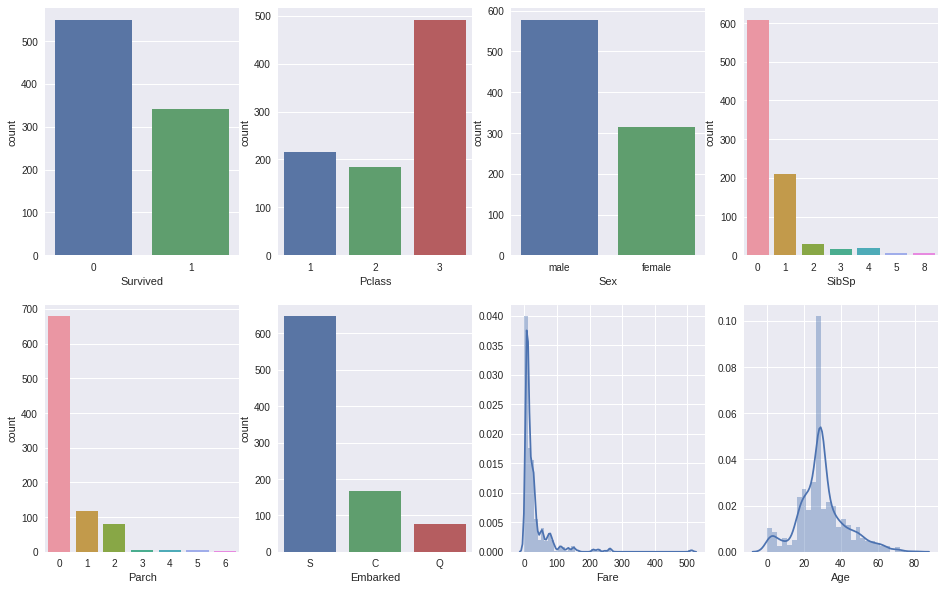

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=train_data,ax=axes[0,0])
sns.countplot('Pclass',data=train_data,ax=axes[0,1])
sns.countplot('Sex',data=train_data,ax=axes[0,2])
sns.countplot('SibSp',data=train_data,ax=axes[0,3])
sns.countplot('Parch',data=train_data,ax=axes[1,0])
sns.countplot('Embarked',data=train_data,ax=axes[1,1])
sns.distplot(train_data['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train_data['Age'].dropna(),kde=True,ax=axes[1,3])

### Bivariate EDA

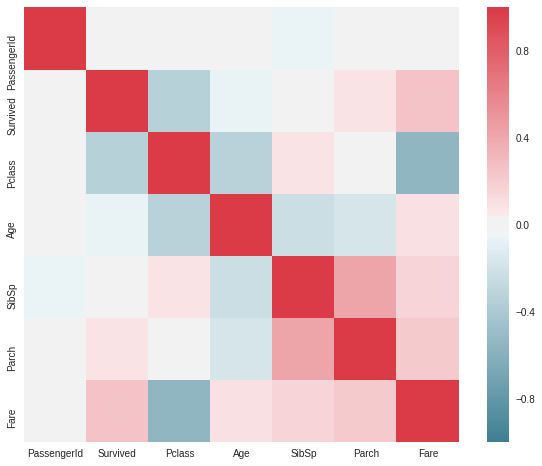

In [20]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Relational EDA

In [21]:
train_data_num_var

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

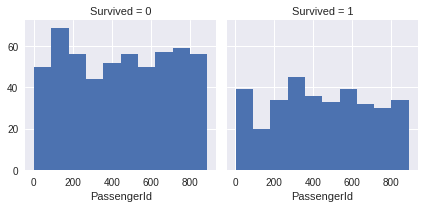

In [22]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'PassengerId', bins=10)

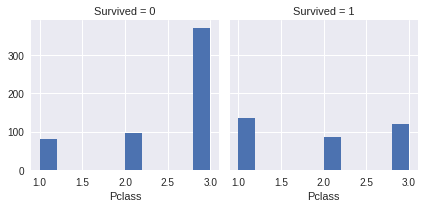

In [23]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Pclass', bins=10)

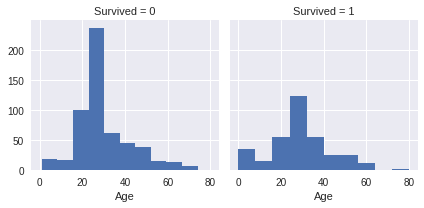

In [24]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=10)

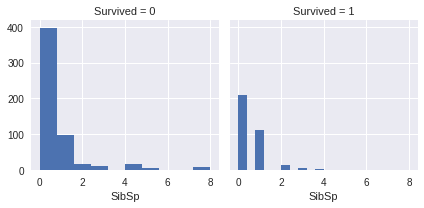

In [25]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'SibSp', bins=10)

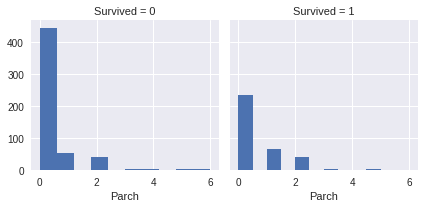

In [26]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Parch', bins=10)

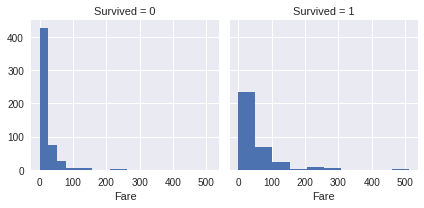

In [27]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

## 7. Enrich Data:
1. SibSp & Parch relates to Family members there cab be a group of individuals or Families.
2. Family = Parch + SibSp + Self
3. Individual = Find Alone Travellers.
4. Sex : We can find how many Male/ Female survivors are there.
5. Age: We can find who are Child / Adult/ Old age travellers
6. Pclass & Fare : Will give us an idea about Financial Status of travellers
7. Cabin & Ticket : Check if we can find some info from Ticket Numeber
8. Embarked : From which destination travellers borded in ship



In [28]:
train_data_cat_var

['Name', 'Sex', 'Embarked']

In [0]:
# 4 Sex:
def personType(Gender):
    if Gender == "female":
        return 1
    elif Gender =="male":
        return 0
    
train_data['Sex'] = train_data['Sex'].apply(personType)
 
# test_data
test_data['Sex'] = test_data['Sex'].apply(personType)

In [30]:
# 5 Age:
def ageType(passAge):
    if passAge < 16:
        return str('Child')
    else :
        return str('adult')
    
# train_data['ageType'] = train_data['Age'].apply(ageType)

print('train dataset: %s, test dataset %s' %(str(train_data.shape), str(test_data.shape)) )

train dataset: (891, 10), test dataset (418, 9)


In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,S


Text(0.5,1,'Aget Distribution -AF')

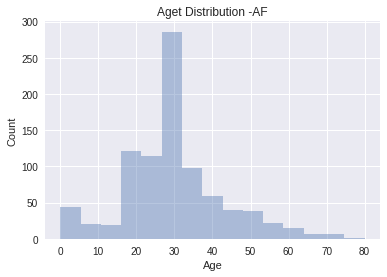

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train_data['Age'],bins=15,kde=False)
plt.ylabel('Count')
plt.title('Aget Distribution -AF')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


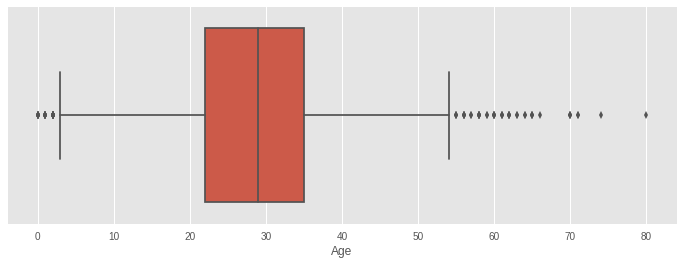

In [33]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.boxplot(x='Age', data = train_data)

### Detect Outliers :

In [0]:
def detect_outliers(train_data,n,features):
  outlier_indices = []
  
  for col in features:
    Q1 = np.percentile(def[col],25)
    Q3 = np.percentile(def[col],75)
    IQR = Q3 - Q1
    
    #

## 8. Build ML Model

In [0]:
X_train_PID = train_data["PassengerId"]
X_test_PID = test_data["PassengerId"]

In [0]:
del train_data['PassengerId']


In [0]:

del train_data['Name']
del train_data['Embarked']

del test_data['PassengerId']
del test_data['Name']
del test_data['Embarked']

In [0]:
X_train = train_data.drop("Survived",axis=1)
y_train = train_data["Survived"]
X_test = test_data.copy()
# Find y_test

In [38]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22,1,0,7
1,1,1,38,1,0,71
2,3,1,26,0,0,7
3,1,1,35,1,0,53
4,3,0,35,0,0,8


In [40]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34,0,0,7
1,3,1,47,1,0,7
2,2,0,62,0,0,9
3,3,0,27,0,0,8
4,3,1,22,1,1,12


### Model 1 : DecisionTreeClassifier

In [59]:
# machine learning

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize :
decision_tree = DecisionTreeClassifier()
# Fit :
decision_tree.fit(X_train, y_train)
# Predict :
y_pred_DT = decision_tree.predict(X_test)
# Model Accuracy  :
acc_decision_tree = round(decision_tree.score(X_test, y_pred_DT) * 100, 2)
acc_decision_tree






100.0

### Model 2 : RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

# Classifier 
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
# Fit Data
model.fit(X_train,y_train)
print("oob_score : ", model.oob_score_)
y_oob = model.oob_prediction_
print("C-stat: ", roc_auc_score(y_train,y_oob))

oob_score :  0.401678856526111
C-stat:  0.8504804056285218


In [43]:
model.feature_importances_

array([0.11549098, 0.32542263, 0.27528248, 0.05568697, 0.0296134 ,
       0.19850354])

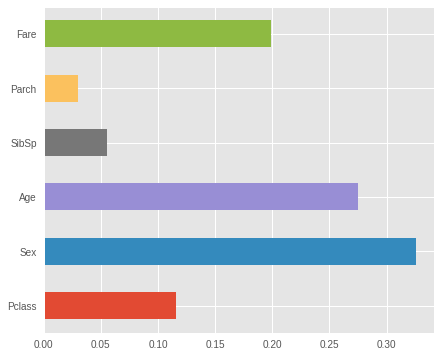

In [44]:
feature_importances = pd.Series(model.feature_importances_,index=X_train.columns)
feature_importances.sort_values()
feature_importances.plot(kind="barh",figsize=(7,6));

## 9. Model Performance :

In [0]:
my_submission  = pd.DataFrame({
    "PassengerId":X_test_PID,
    "Survived":Y_pred
})
my_submission.to_csv("afarane_titanic_kaggle.csv",index=False)

In [46]:
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [47]:
my_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## 10. Model Outcome: